In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [3]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df = df.sort_values(1, ascending=False).reset_index(drop=True)

In [4]:
df

,seq,0,1
0,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCTATTCC...,0,4
1,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCCCCTAG...,0,4
2,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCTAATTA...,0,4
3,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCGAGGGG...,0,4
4,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCAGGACC...,0,4
...,...,...,...
120091,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCATATCA...,1,0
120092,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCATATCA...,1,0
120093,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCGGATGG...,1,0
120094,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGACGTCGGATGG...,1,0


In [6]:
# data = df.head(1000)
data = df.sample(n=25000)
# data = df.copy()

In [7]:
n_rounds = 1
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [8]:
set(data[0])

{0, 1, 2}

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [11]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

loading object (# entries) 25000


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np



##NEW JOB
ignore kernel 1
# rounds 1
# batches 1
# enr_series True
next w 14 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0


before kernel optimization.


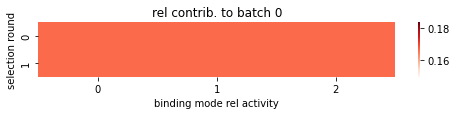


#activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


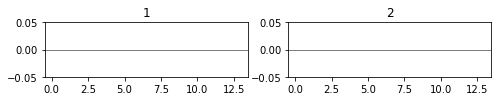

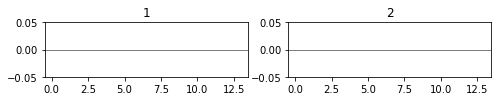

kernels mask [0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 100
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch: 101, Loss: 0.844317 , best epoch: 21 secs per epoch: 1.178 s


In [ ]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

n_epochs = 1000
log_each = 100
n_kernels = 3

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

import time
t0 = time.time()

for ignore_kernel in [1]: # [0, 1]:
    print('\n\n##NEW JOB')
    print('ignore kernel', ignore_kernel)
    model_by_k, res_next = mb.tl.train_iterative(train, device, w=14, show_logo=True, opt_kernel_shift=True,
                                                 dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                 lr=[0.01, 0.01, 0.01, 0.01], weight_decay=[0.01, 0.001, 0.001, 0.001], ignore_kernel=ignore_kernel,
                                                 num_epochs=n_epochs, early_stopping=100, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                 n_kernels=n_kernels, log_each=log_each, stop_at_kernel=None) #  seed=seed) # seeds.index[0]) # 
    print('##DONE....\n\n')

    
print('total time: %.3f s' % ((time.time() - t0)))    
# res = []
# model_by_k = {}
